In [203]:
"""
1.Title: Customer Churn Analysis and Prediction

2. Executive Summary :
   This project analyzes customer behavior for a telecom provider and builds a machine learning model that predicts whether a customer will churn (leave) in the near future. Using exploratory data analysis (EDA),
   the project identifies the main factors associated with churn (tenure, contract type, monthly charges, internet service). Multiple classification models were trained and evaluated; the Random Forest classifier
   produced strong performance and provides interpretable feature importance. The model can be used to prioritize retention actions for at-risk customers.

3. Dataset Description :     it supervised data bez it has output presnet in given data output culm chrun is presnt
    Rows: 7043 (customers)
    key columns:
       gender, SeniorCitizen, Partner, Dependents
       tenure (months)
       PhoneService, MultipleLines
       InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV,StreamingMovies
       Contract (Month-to-month / One year / Two year)
       PaperlessBilling, PaymentMethod
       MonthlyCharges, TotalCharges
       Churn (target: Yes/No)

4. Project Goal:
       Business goal: Reduce revenue loss by predicting customers likely to churn so that targeted retention actions can be taken (offers, support outreach, etc.).
       Technical goal: Build and evaluate a classification model that predicts churn with good recall (catch as many churners as possible) while maintaining acceptable precision.
"""

'\n1.Title: Customer Churn Analysis and Prediction\n\n2. Executive Summary :\n   This project analyzes customer behavior for a telecom provider and builds a machine learning model that predicts whether a customer will churn (leave) in the near future. Using exploratory data analysis (EDA),\n   the project identifies the main factors associated with churn (tenure, contract type, monthly charges, internet service). Multiple classification models were trained and evaluated; the Random Forest classifier\n   produced strong performance and provides interpretable feature importance. The model can be used to prioritize retention actions for at-risk customers.\n\n3. Dataset Description :\n    Rows: 7043 (customers)\n    key columns:\n       gender, SeniorCitizen, Partner, Dependents\n       tenure (months)\n       PhoneService, MultipleLines\n       InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV,StreamingMovies\n       Contract (Month-to-month / One y

In [241]:
# ================================
# Import Libraries (Clean Version)
# ================================

# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model training
from sklearn.model_selection import train_test_split


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [242]:
# Data Loading
df = pd.read_csv("Dataset.csv")          ## Import data from csv file

# Quick inspection
df.head()
print("====Random sample====")
df.sample(5)

====Random sample====


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4475,4693-VWVBO,Female,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.55,61.05,No
1998,7615-ESMYF,Female,0,Yes,No,2,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,44.60,97.1,Yes
6156,0118-JPNOY,Female,1,No,No,26,Yes,No,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),85.80,2193.65,No
2033,8305-VHZBZ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.2,Yes
5964,9782-LGXMC,Female,0,Yes,Yes,49,Yes,No,DSL,Yes,...,Yes,Yes,No,No,Month-to-month,No,Bank transfer (automatic),61.75,3024.15,No


In [243]:
# Column Name Lowercase         used capitalized to make every string makes equal for better to read
print("===== Dataset =====")
df.columns = df.columns.str.strip()
# strip() Removes extra spaces from the beginning and end of column names
df.head()


===== Dataset =====


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [244]:
# Feature cardinality
print("=====Unique values per column=====")
df.nunique()

=====Unique values per column=====


customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [208]:
# ============================================================
"EXPLORATION & DESCRIPTIVE ANALYSIS OF THE DATASET"
# ============================================================


'EXPLORATION & DESCRIPTIVE ANALYSIS OF THE DATASET'

In [245]:
print("===== Dataset Shape =====")
#how many rows and columns in given dataframe
df.shape


===== Dataset Shape =====


(7043, 21)

In [246]:
print("\n===== Dataset Info =====")
# Data summary
df.info()


===== Dataset Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

In [247]:
print("\n===== Missing Values =====")
#Check null values
df.isnull().sum()

# Insight

    #Need to change data type of TotalCharges Column from object -> float64
    #No Missing Value, but should check again after handling data type



===== Missing Values =====


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [249]:
df["TotalCharges"].value_counts()

TotalCharges
20.2      11
          11
19.75      9
19.65      8
19.9       8
          ..
1990.5     1
7362.9     1
346.45     1
306.6      1
108.15     1
Name: count, Length: 6531, dtype: int64

In [250]:
df['TotalCharges'].replace(" ",np.nan,inplace=True)

In [251]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [212]:
# Handling Data Type: Convert TotalCharges to numeric, treating spaces/errors as NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")                           # errors="coerce" "coerce" means replace those bad values with NaN (which means “missing value”).


In [213]:
#Impute NaN values (resulting from the conversion) with the median                As there was 11 in total Nan=N values in Total charges
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)              #The median because it is not affected by outliers and gives a more accurate replacement value for TotalCharges
# Outliers: An outlier is a value that is very different from all the other values.
# If most people are 5–6 feet tall, but one person is 12 feet tall.That 12 feet is an outlier
# Outliers can mess up the average (mean), but they do not affect the median much.
# That’s why we often use median to fill missing values.

#After imputing NaN values checking if its really gone
df["TotalCharges"].isna().sum()
print("There isn't any null values")

There isn't any null values


In [214]:
#After imputing NaN values checking if its replacing NaN values using mediean
print("\n===== Dataset Info =====")
# Data summary
df["TotalCharges"].info()

print("\n===== Missing Values =====")
#Check null values
df["TotalCharges"].isnull().sum()



===== Dataset Info =====
<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB

===== Missing Values =====


np.int64(0)

In [215]:
# Statistic Descriptive
print("\n===== Statistical Summary (Numeric) =====")
df.describe()





===== Statistical Summary (Numeric) =====


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [216]:
print("\n===== Insights Statistical Summary (Numeric) =====")
print(" The numeric summary reveals important characteristics of the telecom customer base. Most customers are not senior citizens (84%). The average customer stays with the company for around 32 months, with tenure varying widely from new joiners to long-term subscribers. MonthlyCharges also show a broad range, indicating diverse service packages. TotalCharges strongly correlate with tenure, showing high variation based on customer longevity. These insights highlight Tenure, MonthlyCharges, and TotalCharges as key features influencing churn prediction.")



===== Insights Statistical Summary (Numeric) =====
 The numeric summary reveals important characteristics of the telecom customer base. Most customers are not senior citizens (84%). The average customer stays with the company for around 32 months, with tenure varying widely from new joiners to long-term subscribers. MonthlyCharges also show a broad range, indicating diverse service packages. TotalCharges strongly correlate with tenure, showing high variation based on customer longevity. These insights highlight Tenure, MonthlyCharges, and TotalCharges as key features influencing churn prediction.


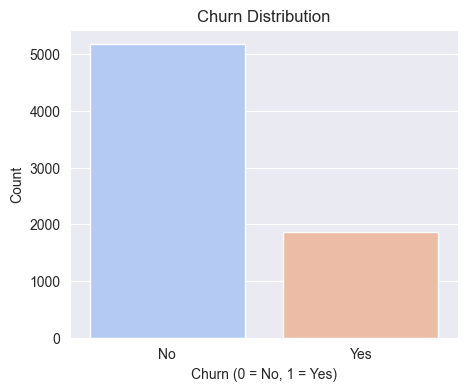

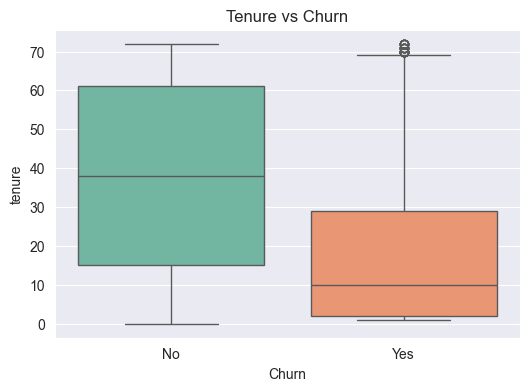

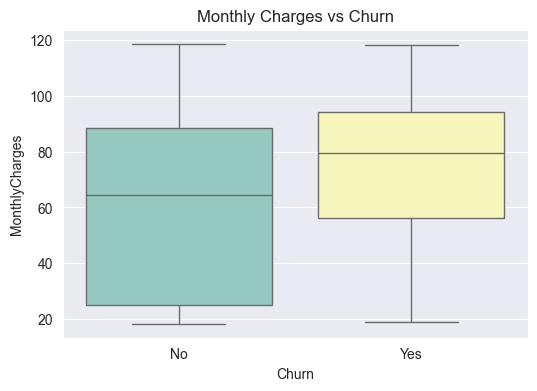

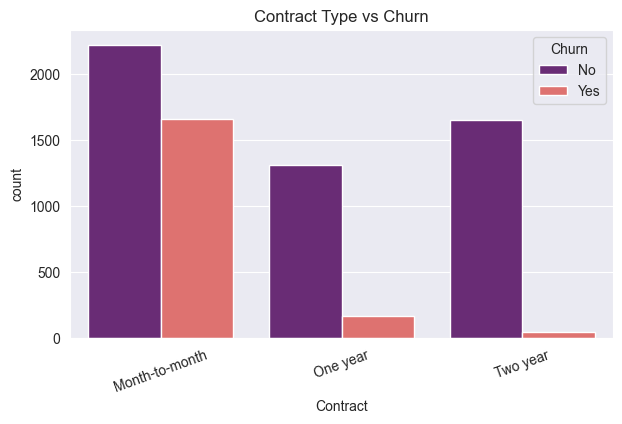

In [217]:
# 1. Churn Distribution
plt.figure(figsize=(5,4))
sns.countplot(x=df['Churn'], palette='coolwarm')
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# 2. Tenure vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Churn'], y=df['tenure'], palette='Set2')
plt.title("Tenure vs Churn")
plt.show()

# 3. Monthly Charges vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Churn'], y=df['MonthlyCharges'], palette='Set3')

plt.title("Monthly Charges vs Churn")
plt.show()

# 4. Contract Type vs Churn
if 'Contract' in df.columns:
   plt.figure(figsize=(7,4))
   sns.countplot(data=df, x='Contract', hue='Churn', palette='magma')
   plt.title("Contract Type vs Churn")
   plt.xticks(rotation=20)
   plt.show()
else:
    # find columns that start with 'Contract' (case-sensitive)
    contract_dummies = [c for c in df.columns if c.startswith('Contract_') or c.lower().startswith('contract_')]
    if contract_dummies:
        # Build a small DataFrame with original contract types by inspecting dummies
        contract_df = df[contract_dummies].idxmax(axis=1)  # returns like 'Contract_Month-to-month'
        contract_df = contract_df.str.replace(r'^Contract_', '', regex=True).rename('Contract_recon')
        plot_df = pd.concat([contract_df, df['Churn']], axis=1)
        plt.figure(figsize=(7,4))
        sns.countplot(data=plot_df, x='Contract_recon', hue='Churn', palette='magma')
        plt.title("Contract Type vs Churn (reconstructed from dummies)")
        plt.xticks(rotation=20)
        plt.show()
    else:
        print("No 'Contract' column or Contract_... dummy columns found. Use the original dataframe before get_dummies.")



In [218]:
print("\n===== Categorical Summary (Object) =====")
df.describe(include="object")


===== Categorical Summary (Object) =====


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [219]:
print("\n===== Insights  Categorical Summary (Object)  =====")
print(" The categorical summary reveals key behavioral patterns of customers. A significant number of customers are on month-to-month contracts and use electronic check payments, both strongly associated with high churn rates. Many customers do not subscribe to support-related services such as online security or tech support, which further increases churn risk. The InternetService type, contract type, and payment method emerge as the most influential categorical features. Meanwhile, gender and multiple lines show minimal impact on churn. These insights guide feature selection and help build an effective churn prediction model.")


===== Insights  Categorical Summary (Object)  =====
 The categorical summary reveals key behavioral patterns of customers. A significant number of customers are on month-to-month contracts and use electronic check payments, both strongly associated with high churn rates. Many customers do not subscribe to support-related services such as online security or tech support, which further increases churn risk. The InternetService type, contract type, and payment method emerge as the most influential categorical features. Meanwhile, gender and multiple lines show minimal impact on churn. These insights guide feature selection and help build an effective churn prediction model.


In [220]:
# Data Duplicate
total_duplicate = df.duplicated().sum()
if total_duplicate == 0:
    print("Total of Duplicated Data:", total_duplicate)
    print("No Duplicate Data")
else:
    print("There is a Duplicate Data")
    print("Total:", total_duplicate)

Total of Duplicated Data: 0
No Duplicate Data


In [221]:
# Data Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler                 #LabelEncoder → convert Yes/No to 0/1
                                                                                              #OneHotEncoder → convert categories (Contract, InternetService) into numbers

In [222]:
#Show number of unique values for every column
for col in df.columns:
 print(col, " → ", df[col].nunique())


customerID  →  7043
gender  →  2
SeniorCitizen  →  2
Partner  →  2
Dependents  →  2
tenure  →  73
PhoneService  →  2
MultipleLines  →  3
InternetService  →  3
OnlineSecurity  →  3
OnlineBackup  →  3
DeviceProtection  →  3
TechSupport  →  3
StreamingTV  →  3
StreamingMovies  →  3
Contract  →  3
PaperlessBilling  →  2
PaymentMethod  →  4
MonthlyCharges  →  1585
TotalCharges  →  6531
Churn  →  2


In [223]:
#View what those values are
#the unique values inside each column:

for col in df.columns:
    print("\nColumn:", col)
    print(df[col].unique())



Column: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Column: gender
['Female' 'Male']

Column: SeniorCitizen
[0 1]

Column: Partner
['Yes' 'No']

Column: Dependents
['No' 'Yes']

Column: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Column: PhoneService
['No' 'Yes']

Column: MultipleLines
['No phone service' 'No' 'Yes']

Column: InternetService
['DSL' 'Fiber optic' 'No']

Column: OnlineSecurity
['No' 'Yes' 'No internet service']

Column: OnlineBackup
['Yes' 'No' 'No internet service']

Column: DeviceProtection
['No' 'Yes' 'No internet service']

Column: TechSupport
['No' 'Yes' 'No internet service']

Column: StreamingTV
['No' 'Yes' 'No internet service']

Column: StreamingMovies
['No' 'Yes' 'No internet service']

Column: Contract
['Month-to-month' 'O

In [ ]:
from sklearn.metrics import precision_recall_curve


In [224]:
#Feature Grouping: Binary, Categorical, and Numerical Columns
binary_cols = [col for col in df.columns if df[col].nunique() == 2]


multi_cols = [
    'Gender', 'Internetservice', 'Contract', 'Paymentmethod',
    'Multiplelines', 'Onlinesecurity', 'Onlinebackup',
    'Deviceprotection', 'Techsupport', 'Streamingtv', 'Streamingmovies'
]

numeric_cols = ['Tenure', 'Monthlycharges', 'Totalcharges']


In [225]:
#Apply Label Encoding (binary columns)
le = LabelEncoder()

for col in binary_cols:
    df[col] = le.fit_transform(df[col])


df[binary_cols].head()



,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,0,0,1,0,0,1,0
1,1,0,0,0,1,0,0
2,1,0,0,0,1,1,1
3,1,0,0,0,0,0,0
4,0,0,0,0,1,1,1


In [226]:
#Apply OneHotEncoder (multi-category columns)
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# One-hot encode
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Verify
df.shape
df.head()








,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [227]:
df.head()
print(df.shape)
print(df.dtypes)


(7043, 7073)
gender                                   int64
SeniorCitizen                            int64
Partner                                  int64
Dependents                               int64
tenure                                   int64
                                         ...  
Contract_One year                         bool
Contract_Two year                         bool
PaymentMethod_Credit card (automatic)     bool
PaymentMethod_Electronic check            bool
PaymentMethod_Mailed check                bool
Length: 7073, dtype: object


In [228]:
#Dropping CustomerId it does NOT help prediction
df = df.drop('customerID', axis=1, errors='ignore')



In [229]:
#Separating Features and Target Variable
X = df.drop('Churn', axis=1)                            #X = everything except the churn column
y = df['Churn']                                         #y = df['Churn']
 #Use all data to predict the Churn value


In [230]:
#Splitting Data into Training and Testing Sets
# In this step, the dataset was divided into two parts: training data and testing data. Splitting the data is essential to ensure that the machine learning model can be trained on one portion of the data and evaluated on another portion that it has never seen before. This helps in checking how well the model generalizes to new, unseen customers.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4, stratify=y)    #stratify=y makes sure your train/test split has the same % of churn Yes/No as the full dataset.
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (5634, 7072)
Test size: (1409, 7072)


In [231]:
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
#Scaling Numerical Features
ss = StandardScaler()

X_train[numeric_cols] = ss.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = ss.transform(X_test[numeric_cols])


In [232]:
print(X_train.select_dtypes(include='object').head())


Empty DataFrame
Columns: []
Index: [3624, 5735, 1736, 5712, 6303]


In [233]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=500, class_weight='balanced')
log_model.fit(X_train, y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [234]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve





Logistic Regression Accuracy: 0.7651

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1035
           1       0.54      0.76      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409



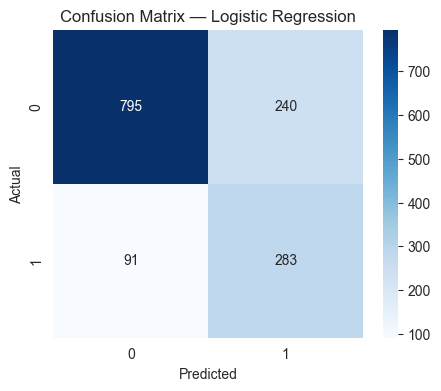

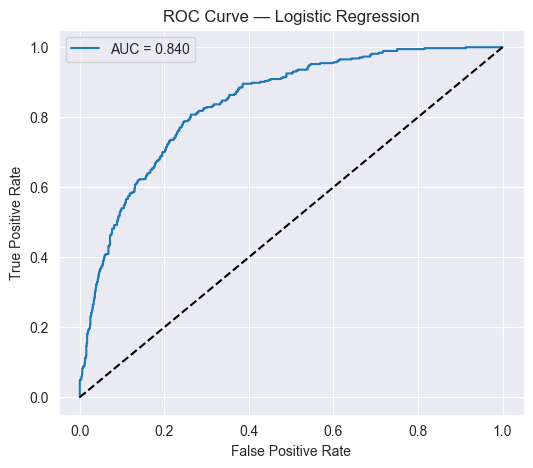

In [235]:
# Make predictions
log_pred = log_model.predict(X_test)
log_proba = (log_model.predict_proba(X_test)[:, 1])

# Accuracy
log_acc = accuracy_score(y_test, log_pred)
print("Logistic Regression Accuracy:", round(log_acc, 4))

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, log_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, log_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, log_proba)
auc = roc_auc_score(y_test, log_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression")
plt.legend()
plt.show()


Random Forest Accuracy: 0.7942

Classification Report (Random Forest):

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1035
           1       0.67      0.45      0.54       374

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



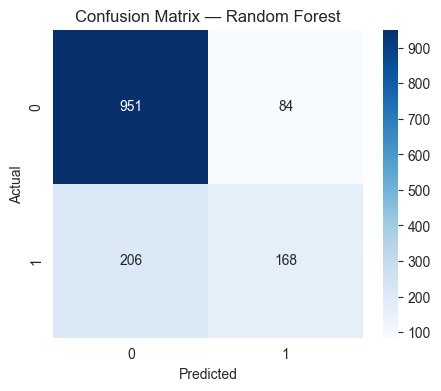

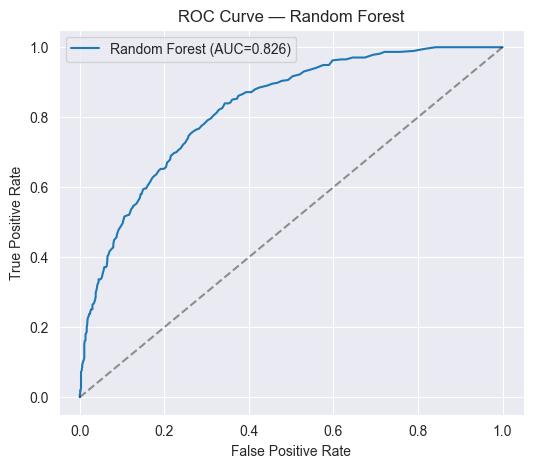

In [236]:
# -------------------------
# Train Random Forest
# -------------------------
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predict & probabilities
rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", round(rf_acc, 4))
print("\nClassification Report (Random Forest):\n")
print(classification_report(y_test, rf_pred))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC curve + AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
auc_rf = roc_auc_score(y_test, rf_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={auc_rf:.3f})")
plt.plot([0,1],[0,1],'k--', alpha=0.4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Random Forest")
plt.legend()
plt.show()


XGBoost Accuracy: 0.7857

Classification Report (XGBoost):

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.50      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



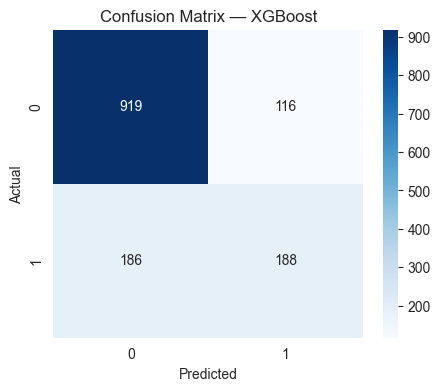

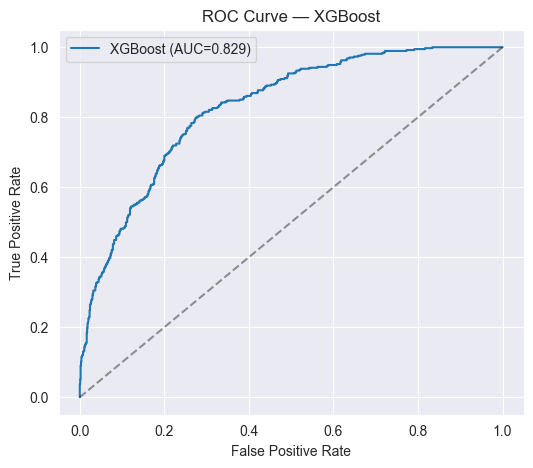

In [237]:
# -------------------------
# Train XGBoost
# -------------------------
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5,
                          use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict & probabilities
xgb_pred = xgb_model.predict(X_test)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate
xgb_acc = accuracy_score(y_test, xgb_pred)
print("XGBoost Accuracy:", round(xgb_acc, 4))
print("\nClassification Report (XGBoost):\n")
print(classification_report(y_test, xgb_pred))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC curve + AUC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)
auc_xgb = roc_auc_score(y_test, xgb_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC={auc_xgb:.3f})")
plt.plot([0,1],[0,1],'k--', alpha=0.4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — XGBoost")
plt.legend()
plt.show()


              accuracy
RandomForest  0.794180
XGBoost       0.785664
Logistic      0.765082


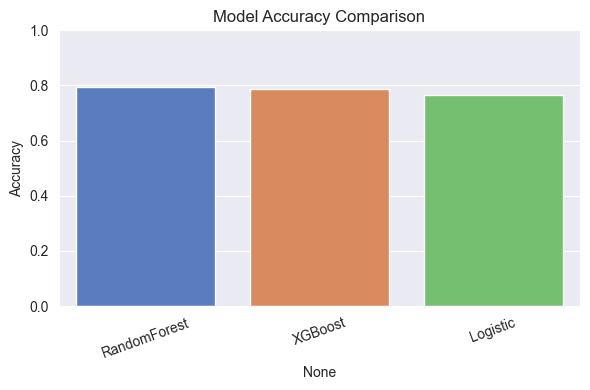

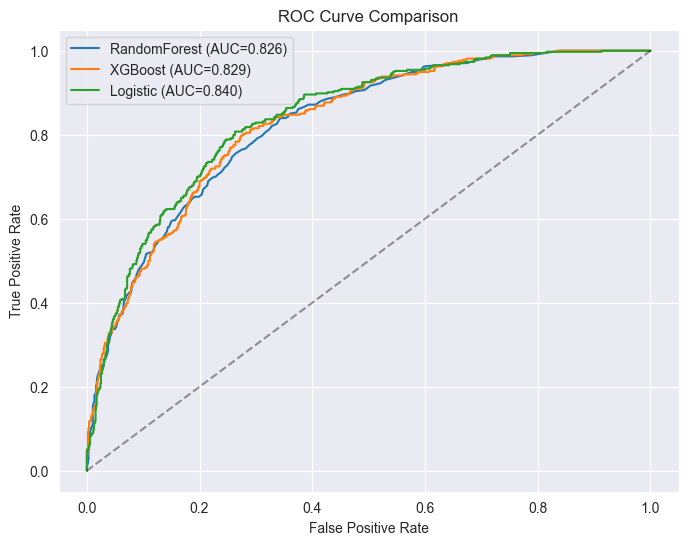

In [238]:
# -------------------------
# Compare models: accuracy table + ROC curves combined
# -------------------------
accs = {
    "Logistic": accuracy_score(y_test, log_pred),
    "RandomForest": accuracy_score(y_test, rf_pred),
    "XGBoost": accuracy_score(y_test, xgb_pred)
}
acc_df = pd.DataFrame.from_dict(accs, orient='index', columns=['accuracy']).sort_values('accuracy', ascending=False)
print(acc_df)

# Bar plot of accuracies
plt.figure(figsize=(6,4))
sns.barplot(x=acc_df.index, y='accuracy', data=acc_df.reset_index(), palette='muted')
plt.ylim(0,1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# Combined ROC
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f"RandomForest (AUC={auc_rf:.3f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC={auc_xgb:.3f})")
if 'log_proba' in globals():
    fpr_log, tpr_log, _ = roc_curve(y_test, log_proba)
    auc_log = roc_auc_score(y_test, log_proba)
    plt.plot(fpr_log, tpr_log, label=f"Logistic (AUC={auc_log:.3f})")
plt.plot([0,1],[0,1], 'k--', alpha=0.4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


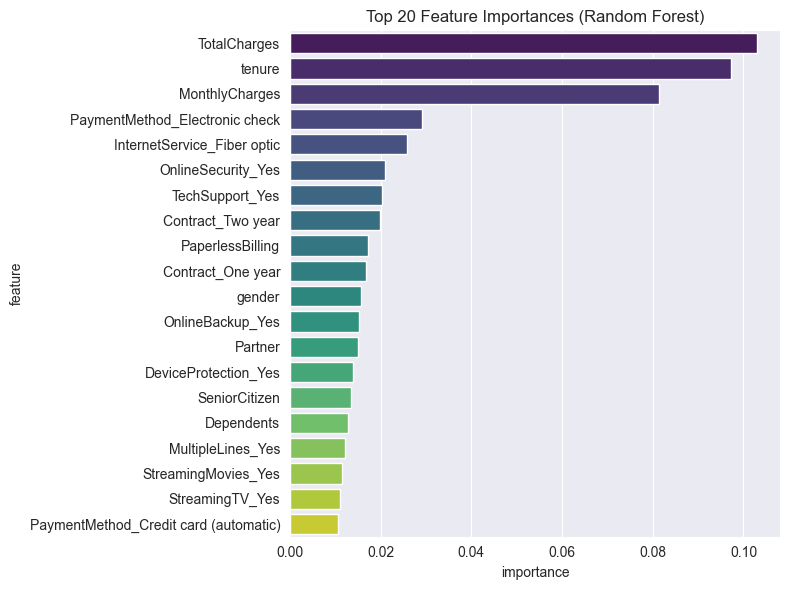

,feature,importance
0,TotalCharges,0.102902
1,tenure,0.097336
2,MonthlyCharges,0.081332
3,PaymentMethod_Electronic check,0.029153
4,InternetService_Fiber optic,0.025718
5,OnlineSecurity_Yes,0.020868
6,TechSupport_Yes,0.020265
7,Contract_Two year,0.019811
8,PaperlessBilling,0.017144
9,Contract_One year,0.016847


In [239]:
# -------------------------
# Feature importance from Random Forest
# -------------------------
importances = rf_model.feature_importances_
feat_names = X_train.columns
feat_imp = pd.DataFrame({"feature": feat_names, "importance": importances}).sort_values("importance", ascending=False).head(20)

plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=feat_imp, palette='viridis')
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

# Print table
feat_imp.reset_index(drop=True)
